In [109]:
import json


In [110]:
dict=""
with open('Dataset/metrics.json','r') as j:
    dict=json.load(j)

In [112]:
dict

{'average_metrics': {'intent': {'f1': 0.9310654882847395,
   'precision': 0.975912975912976,
   'recall': 0.898026973026973},
  'slot': {'f1': 0.5950492414160233,
   'precision': 0.6524743230625585,
   'recall': 0.5685574229691878}},
 'confusion_matrix': {'intents': ['email',
   'getGreeting',
   'getNews',
   'getSearch',
   'getTime',
   'getWeather',
   'helpme',
   'launchApp',
   'openWeb',
   'playMusic',
   'shutdown',
   'null'],
  'matrix': [[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 6, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2],
   [0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 1],
   [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 1],
   [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]},
 'metrics': {'email': {'exact_parsings': 8,
   'inten

In [113]:
intents=dict['confusion_matrix']['intents']

In [114]:
intents

['email',
 'getGreeting',
 'getNews',
 'getSearch',
 'getTime',
 'getWeather',
 'helpme',
 'launchApp',
 'openWeb',
 'playMusic',
 'shutdown',
 'null']

In [115]:
d=[]
p=[]
f=[]
j=0
for i in dict['metrics'].keys():
    k=dict['metrics'][i]
    d.append(k['intent']['recall'])
    p.append(k['intent']['precision'])
    f.append(k['intent']['f1'])
    j+=1
print(d)
print(p)

[1.0, 0.6666666666666666, 0.8571428571428571, 0.875, 0.8, 0.8461538461538461, 1.0, 1.0, 0.0, 1.0, 1.0, 0.8333333333333334]
[0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 0.8461538461538461, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]


In [116]:
import pandas as pd

In [117]:
df=pd.DataFrame({'intents':intents,'recall':d,'precision':p,'f1_score':f})
df

,intents,recall,precision,f1_score
0,email,1.000000,0.888889,0.941176
1,getGreeting,0.666667,1.000000,0.800000
2,getNews,0.857143,1.000000,0.923077
3,getSearch,0.875000,1.000000,0.933333
4,getTime,0.800000,1.000000,0.888889
5,getWeather,0.846154,0.846154,0.846154
6,helpme,1.000000,1.000000,1.000000
7,launchApp,1.000000,1.000000,1.000000
8,openWeb,0.000000,0.000000,0.000000
9,playMusic,1.000000,1.000000,1.000000


In [118]:
import matplotlib.pyplot as plt

In [119]:
import seaborn as sns

In [120]:
def plot(df):
    df['recall']*=100
    df['precision']*=100
    sns.lmplot('recall','precision',data=df,hue='slotNames',fit_reg=False)
    plt.show()
def plot1(df):
    df['recall']*=100
    df['precision']*=100
    sns.lmplot('recall','precision',data=df,hue='intents',fit_reg=False)
    plt.show()

email


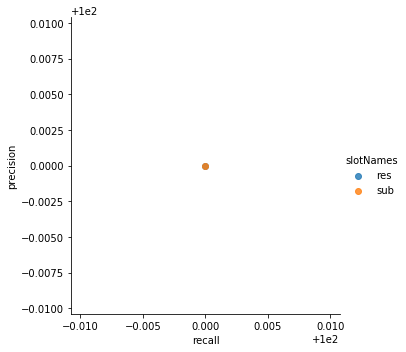

getGreeting


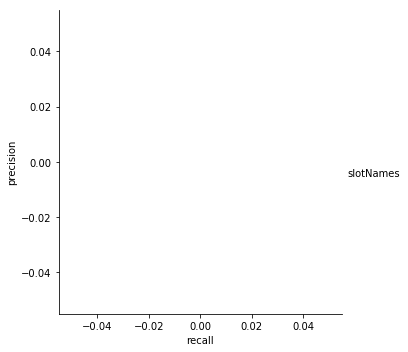

getNews


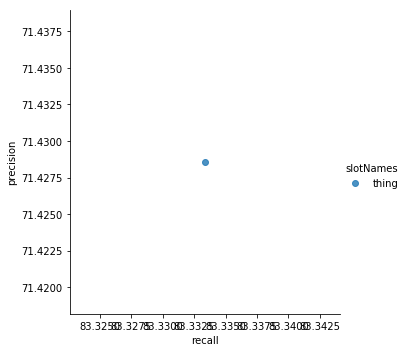

getSearch


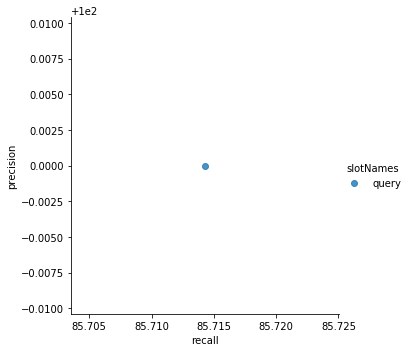

getTime


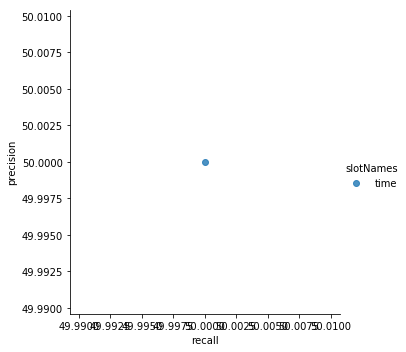

getWeather


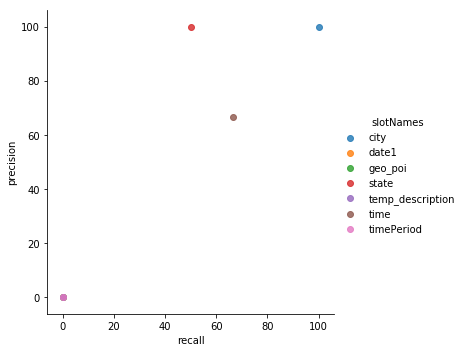

helpme


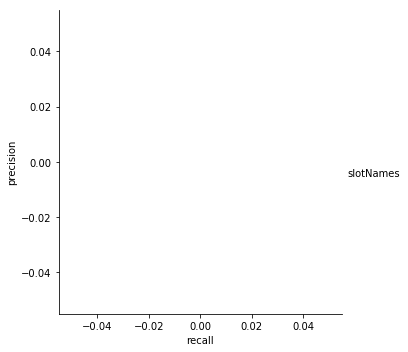

launchApp


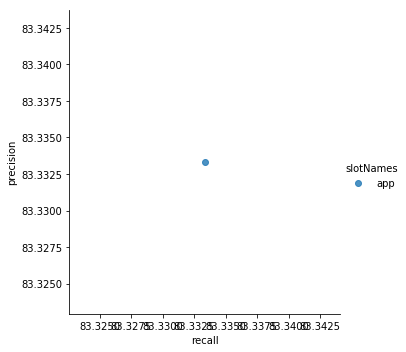

null


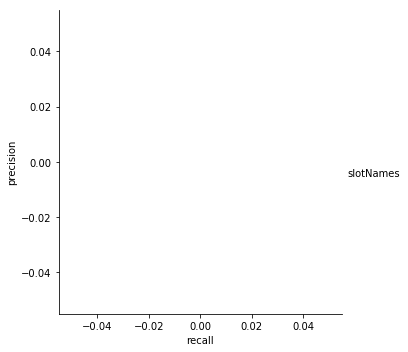

openWeb


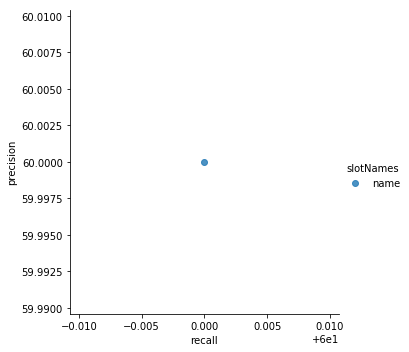

playMusic


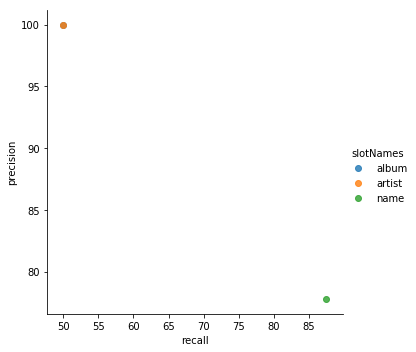

shutdown


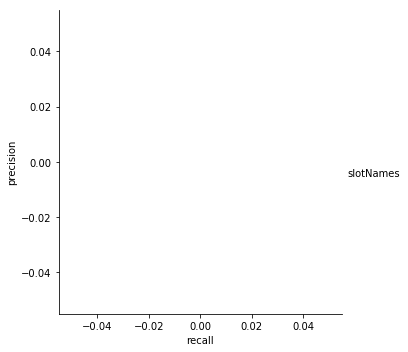

In [121]:
for i in dict['metrics']:
    k=dict['metrics'][i]
    #print(dict['metrics'][i])
    sl=[]
    dl=[]
    pl=[]
    for l in k['slots']:
        o=k['slots'][l]
        sl.append(l)
        dl.append(o['recall'])
        pl.append(o['precision'])
    df1=pd.DataFrame({'slotNames':sl,'recall':dl,'precision':pl})
    print(i)
    plot(df1)
        

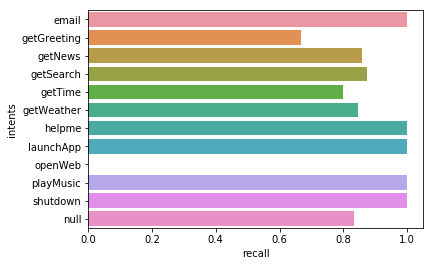

In [122]:
sns.barplot(x='recall',y='intents',data=df)
plt.show()

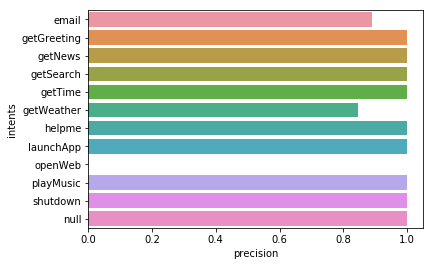

In [123]:
sns.barplot(x='precision',y='intents',data=df)
plt.show()

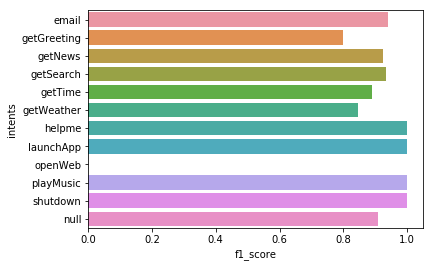

In [124]:
sns.barplot(x='f1_score',y='intents',data=df)
plt.show()

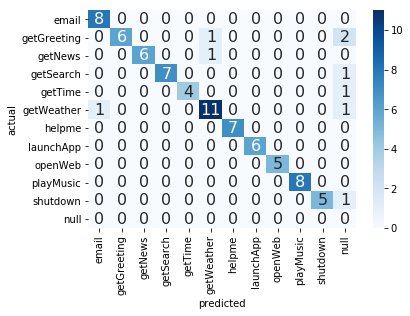

In [128]:
cf=dict['confusion_matrix']['matrix']
data=pd.DataFrame(cf,columns=intents,index=intents)
data.columns.name='predicted'
data.index.name='actual'
sns.heatmap(data, cmap="Blues", annot=True,annot_kws={"size": 16})
plt.show()

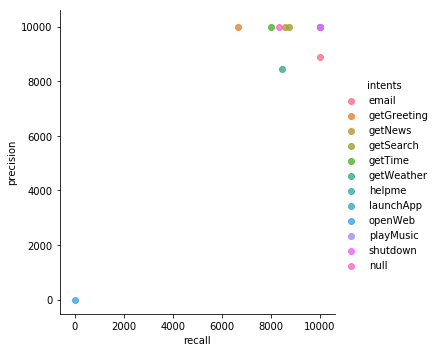

In [127]:
plot1(df)